<a href="https://colab.research.google.com/github/Srabanisarkar/Iris/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
read_file=pd.read_csv("/content/drive/MyDrive/DATASET/abalone_original.csv")
read_file

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [3]:
read_file.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


In [4]:
read_file.tail()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10
4176,M,142,111,39,389.7,189.1,75.3,99.0,12


In [5]:
read_file.shape

(4177, 9)

In [6]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


Feature Engineering

In [7]:
read_file.describe()

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


In [8]:
read_file.isna().sum()

sex               0
length            0
diameter          0
height            0
whole-weight      0
shucked-weight    0
viscera-weight    0
shell-weight      0
rings             0
dtype: int64

In [9]:
read_file['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: sex, Length: 4177, dtype: object>

In [10]:
file1=pd.get_dummies(read_file['sex'],drop_first= True)
file1

,I,M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
4172,0,0
4173,0,1
4174,0,1
4175,0,0


In [11]:
read_file=pd.concat([file1,read_file],axis=1)
read_file

,I,M,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,0,1,M,91,73,19,102.8,44.9,20.2,30.0,15
1,0,1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,0,0,F,106,84,27,135.4,51.3,28.3,42.0,9
3,0,1,M,88,73,25,103.2,43.1,22.8,31.0,10
4,1,0,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0,0,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,0,1,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,0,1,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,0,0,F,125,97,30,218.9,106.2,52.2,59.2,10


In [12]:
read_file.drop('sex',axis=1,inplace= True)

Feature Selection

In [13]:
read_file.columns

Index(['I', 'M', 'length', 'diameter', 'height', 'whole-weight',
       'shucked-weight', 'viscera-weight', 'shell-weight', 'rings'],
      dtype='object')

In [14]:
#select input and output
X=read_file.drop('rings',axis=1)
y=read_file['rings']
X.head()

,I,M,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
0,0,1,91,73,19,102.8,44.9,20.2,30.0
1,0,1,70,53,18,45.1,19.9,9.7,14.0
2,0,0,106,84,27,135.4,51.3,28.3,42.0
3,0,1,88,73,25,103.2,43.1,22.8,31.0
4,1,0,66,51,16,41.0,17.9,7.9,11.0


In [15]:
corr=X.corr()
corr.shape

(9, 9)

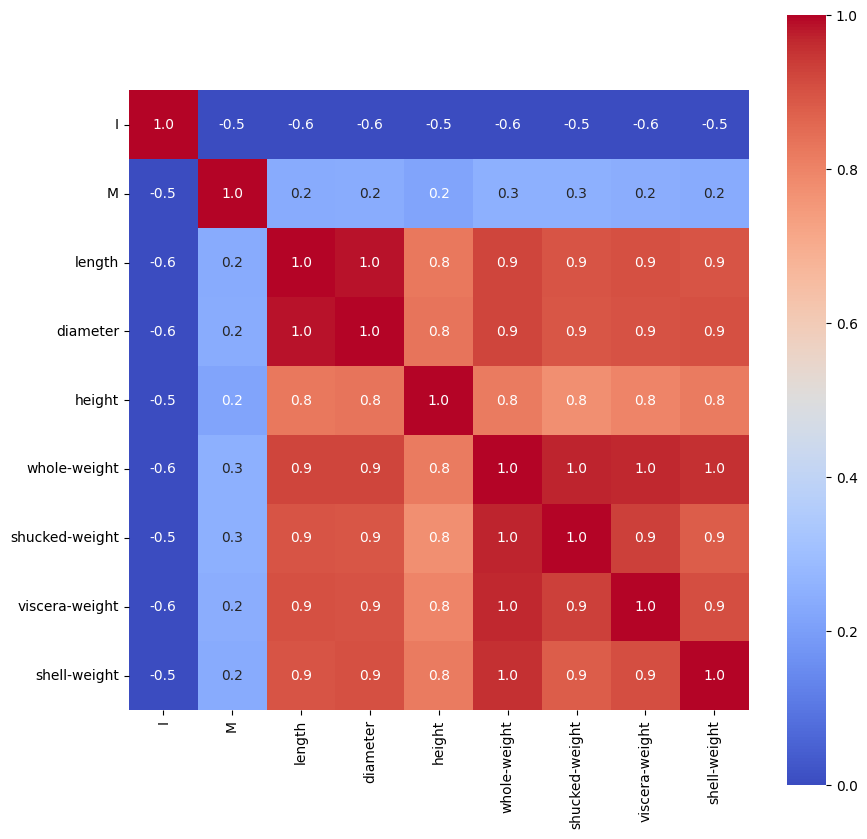

In [16]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmin=0,vmax=1,cbar= True,square= True, annot= True, fmt=".1f",cmap='coolwarm')
plt.show()

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features=correlation(X,0.9)
len(set(corr_features))

5

In [19]:
corr_features

{'diameter',
 'shell-weight',
 'shucked-weight',
 'viscera-weight',
 'whole-weight'}

In [20]:
X_new=X.drop(corr_features,axis=1)
X_new.head()

,I,M,length,height
0,0,1,91,19
1,0,1,70,18
2,0,0,106,27
3,0,1,88,25
4,1,0,66,16


split the train and test data with Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=.30,random_state=1)
y_train.shape

(2923,)

In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_new_train,y_train)

LinearRegression()

In [23]:
y_pred=lm.predict(X_new_test)

In [24]:
# module Evauation
import sklearn.metrics as metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.8349758424167244
MSE: 6.559487635736955
RMSE: 2.5611496707019983


Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1.0)
rr.fit(X_new_train,y_train)

Ridge()

In [26]:
y_pred=rr.predict(X_new_test)
print(y_pred)

[ 8.94046947 10.75553101  8.46548963 ...  9.65777827  9.99272239
  5.75029702]


In [27]:
# module Evauation
import sklearn.metrics as metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.8349949848145461
MSE: 6.559723672523368
RMSE: 2.561195750528133
